In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [4]:
%matplotlib inline

In [6]:
customers = pd.read_csv('Ecommerce Customers')

In [8]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


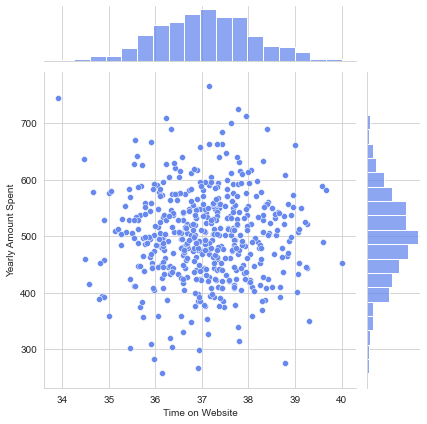

In [16]:
sns.set_palette('coolwarm')
sns.set_style('whitegrid')
sns.jointplot(x=customers['Time on Website'],y=customers['Yearly Amount Spent'],data=customers,kind='scatter')

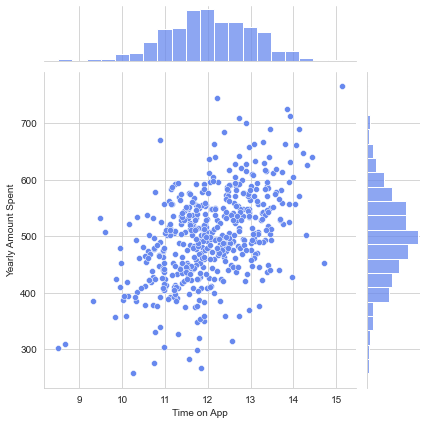

In [17]:
sns.set_palette('coolwarm')
sns.set_style('whitegrid')
sns.jointplot(x=customers['Time on App'],y=customers['Yearly Amount Spent'],data=customers,kind='scatter')

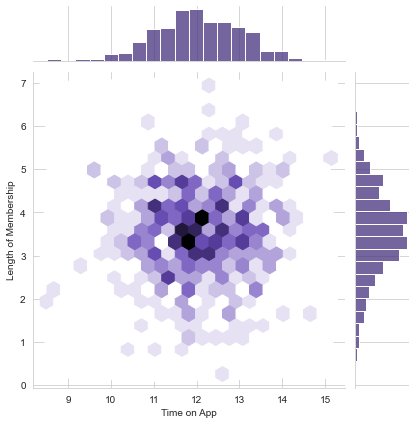

In [20]:
sns.set_palette('viridis')
sns.set_style('whitegrid')
sns.jointplot(x=customers['Time on App'],y=customers['Length of Membership'],data=customers,kind='hex')

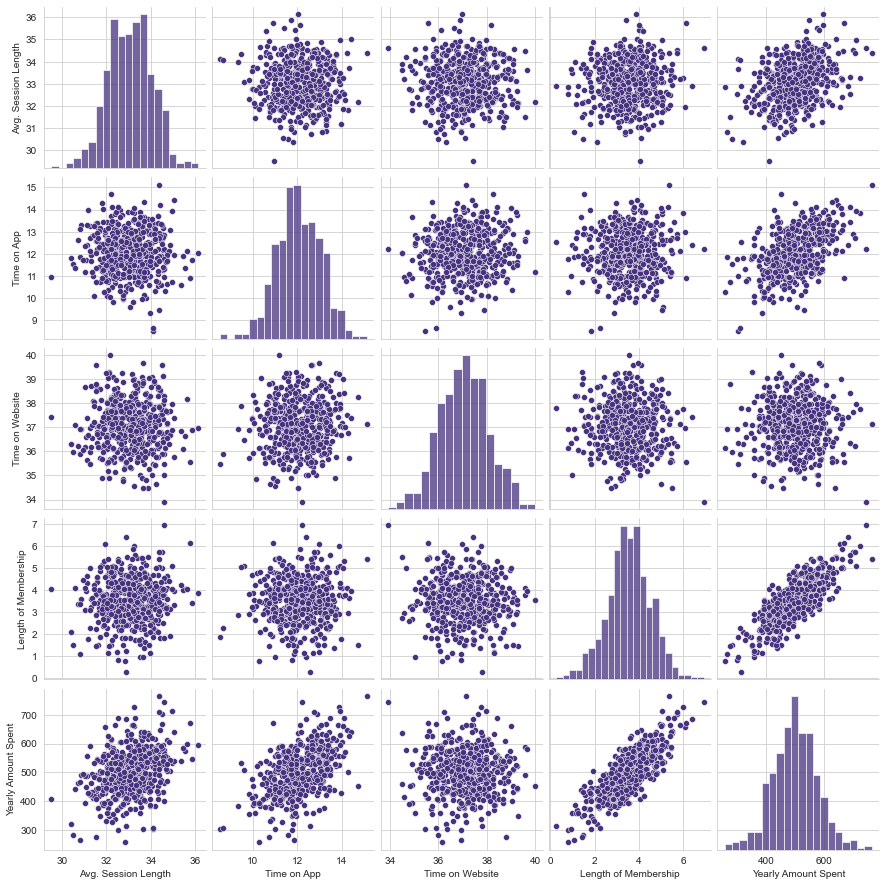

In [21]:
sns.pairplot(customers)

<Figure size 1440x1080 with 0 Axes>

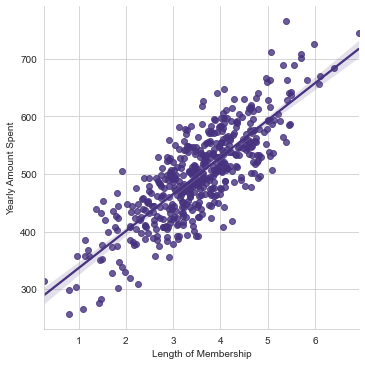

In [26]:
plt.figure(figsize=(20,15))
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [33]:
y = customers['Yearly Amount Spent']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
print('coefficients:\n', lm.coef_)

coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [43]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

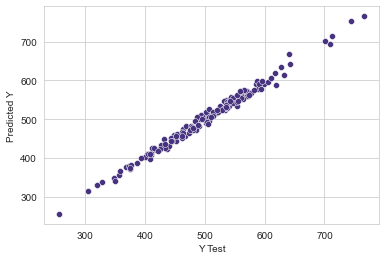

In [45]:
sns.scatterplot(x=y_test,y=prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
from sklearn import metrics

In [47]:
metrics.mean_absolute_error(y_true=y_test,y_pred=prediction)

7.228148653430838

In [48]:
metrics.mean_squared_error(y_true=y_test,y_pred=prediction)

79.81305165097461

In [49]:
np.sqrt(metrics.mean_squared_error(y_true=y_test,y_pred=prediction))

8.933815066978642

D:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

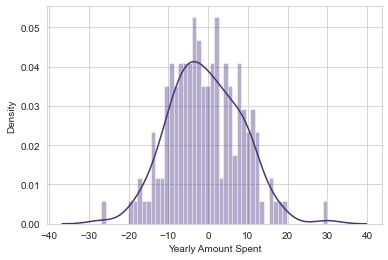

In [51]:
sns.distplot((y_test-prediction),bins=50)

In [53]:
coefficients = pd.DataFrame(data=lm.coef_,index=X.columns,columns=['Coefficients'])

In [54]:
coefficients.head()

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
